In [37]:
from google.colab import files

uploaded = files.upload()

Saving Snapchat-758725511.jpg to Snapchat-758725511.jpg


In [2]:
%cd /content/drive/My Drive/Deep Learning/Face Recognition

/content/drive/My Drive/Deep Learning/Face Recognition


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/arko/
  inflating: dataset/arko/00000.png  
  inflating: dataset/arko/00001.png  
  inflating: dataset/arko/00002.png  
  inflating: dataset/arko/00003.png  
  inflating: dataset/arko/00004.png  
  inflating: dataset/arko/00005.png  
  inflating: dataset/arko/00006.png  
  inflating: dataset/arko/00007.png  
  inflating: dataset/arko/00008.png  
  inflating: dataset/arko/00009.png  
  inflating: dataset/arko/00010.png  
  inflating: dataset/arko/00011.png  
  inflating: dataset/arko/00012.png  
  inflating: dataset/arko/00013.png  
  inflating: dataset/arko/00014.png  
  inflating: dataset/arko/00015.png  
  inflating: dataset/arko/00016.png  
  inflating: dataset/arko/00017.png  
  inflating: dataset/arko/00018.png  
  inflating: dataset/arko/00019.png  
  inflating: dataset/arko/00020.png  
  inflating: dataset/arko/00021.png  
  inflating: dataset/arko/00022.png  
  inflating: dataset/arko/00023.png  
  inflating: data

In [4]:
!pip install imutils
!pip install face_recognition

     |████████████████████████████████| 100.2MB 113kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=c960b9812d61966b56734b6e4ead1912e1f50cc15b5944bcef7b1a077f03f68b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [9]:
%cd /content/drive/My Drive/Deep Learning/Face Recognition/dlib

/content/drive/My Drive/Deep Learning/Face Recognition/dlib


In [13]:
!python setup.py install 

running install
running bdist_egg
running egg_info
creating tools/python/dlib.egg-info
writing tools/python/dlib.egg-info/PKG-INFO
writing dependency_links to tools/python/dlib.egg-info/dependency_links.txt
writing top-level names to tools/python/dlib.egg-info/top_level.txt
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'tools/python/build*'
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.6.9 (default, Apr 18 2020, 01:56:04) 
Invoking CMake setup: 'cmake /content/drive/My Drive/Deep Learning/Face Recognition/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/drive/My Drive/Deep Learning/Face Recognition/dlib/build/lib.linux-x86_64-3.6 

In [15]:
% cd ..

/content/drive/My Drive/Deep Learning/Face Recognition


In [14]:
from imutils import paths
import face_recognition
import os, cv2
import pickle 

In [30]:
print("[INFO] Quantifying faces...")
imagePaths = list(paths.list_images('dataset'))

knownEncodings = []
knownNames = []

[INFO] Quantifying faces...


In [31]:
imagePaths

['dataset/arko/00000.png',
 'dataset/arko/00001.png',
 'dataset/arko/00002.png',
 'dataset/arko/00003.png',
 'dataset/arko/00004.png',
 'dataset/arko/00005.png',
 'dataset/arko/00006.png',
 'dataset/arko/00007.png',
 'dataset/arko/00008.png',
 'dataset/arko/00009.png',
 'dataset/arko/00010.png',
 'dataset/arko/00011.png',
 'dataset/arko/00012.png',
 'dataset/arko/00013.png',
 'dataset/arko/00014.png',
 'dataset/arko/00015.png',
 'dataset/arko/00016.png',
 'dataset/arko/00017.png',
 'dataset/arko/00018.png',
 'dataset/arko/00019.png',
 'dataset/arko/00020.png',
 'dataset/arko/00021.png',
 'dataset/arko/00022.png',
 'dataset/arko/00023.png',
 'dataset/arko/00024.png',
 'dataset/arko/00025.png',
 'dataset/arko/00026.png',
 'dataset/arko/00027.png',
 'dataset/arko/00028.png',
 'dataset/arko/00029.png',
 'dataset/arko/00030.png',
 'dataset/arko/00031.png',
 'dataset/arko/00032.png',
 'dataset/arko/00033.png',
 'dataset/arko/00034.png',
 'dataset/arko/00035.png',
 'dataset/arko/00036.png',
 

In [ ]:
for (i, imagePath) in enumerate(imagePaths):
    print("[INFO] processing image {}/{}".format(i+1, len(imagePaths)))
    name = imagePaths[i].split(os.path.sep)[-2]

    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes = face_recognition.face_locations(rgb, model='cnn')
    encodings = face_recognition.face_encodings(rgb, boxes)

    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

In [ ]:
knownNames

In [35]:
print("[INFO] Serializing encodings...")
data = {"encodings": knownEncodings,
        "names": knownNames}

f = open("encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] Serializing encodings...


In [51]:
print("[INFO] loading encodings...")
data = pickle.loads(open("encodings.pickle", "rb").read())

image = cv2.imread("image.jpg") #image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb, model='cnn')
encodings = face_recognition.face_encodings(rgb, boxes)

names = []

[INFO] loading encodings...
[INFO] recognizing faces...


In [52]:
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "unknown"

    if True in matches:
        matchedIdx = [i for (i,b) in enumerate(matches) if b]
        counts = {}

        for i in matchedIdx:
            name = data["names"][i]
            counts[name] = counts.get(name, 0)+1

        name = max(counts, key=counts.get)
    
    names.append(name)

In [ ]:
matchedIdx

In [43]:
counts

{'arko': 41}

In [46]:
from google.colab.patches import cv2_imshow

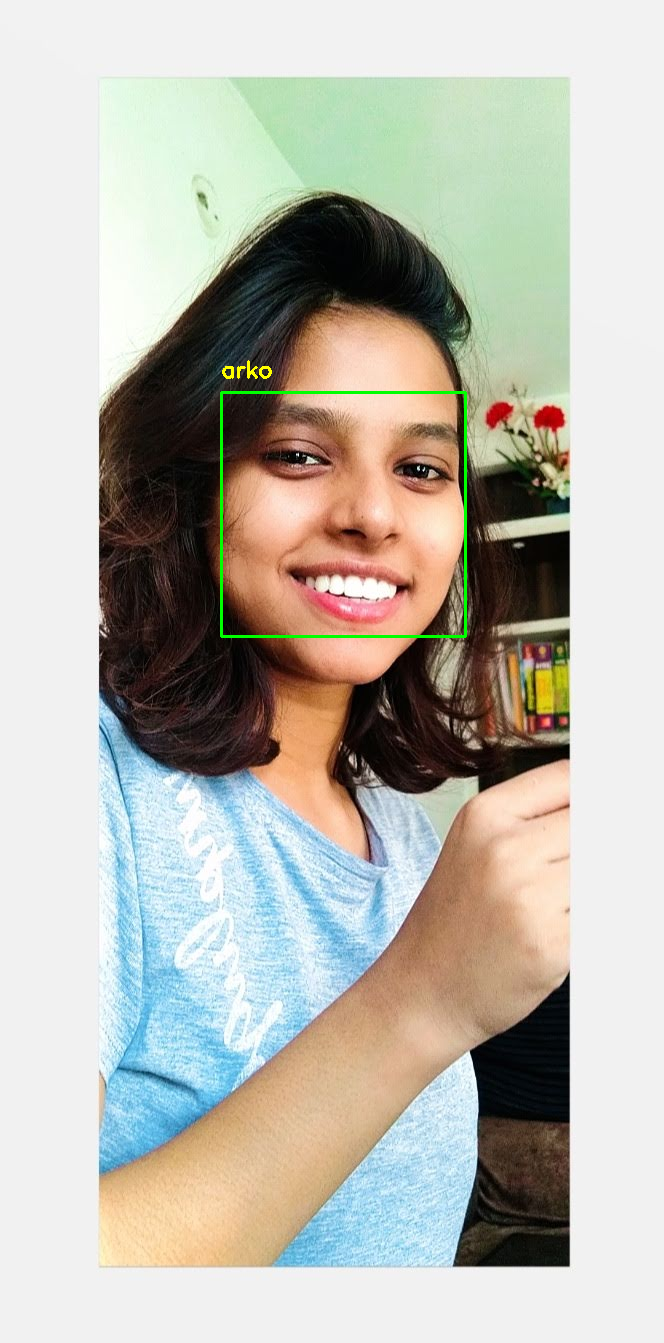

-1

In [53]:
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 2)
    y = top - 15 if top - 15 > 15 else top + 15 
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
                0.75, (0, 255, 255), 2)

cv2_imshow(image)
cv2.waitKey(0)